In [1]:
import pickle as pkl
import numpy as np
import pk_plot_library as pplib
from figrid.data_sort import DataSort

pplib.imports()
WEBPATH = '/Users/cosinga/code/calvinosinga.github.io/hicolor/sup_analysis/'

In [2]:
ds = DataSort()
ds.loadHdf5('/Users/cosinga/code/hcolor/fig_md_analysis/color-mass.hdf5')

ds.tickArgs(direction = 'in', labelsize = 14, right = True, top = True)
ds.legendArgs(frameon = False, loc = 'upper right', fontsize = 14, slc = (-1, -1))
ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 16, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 16, ha = 'center', va = 'top')
ds.axisLabelArgs('both', fontsize = 16)

ds.setOrder('dust', ['no_dust', 'dust'])
ds.displayAs('dust', ['no_dust', 'dust'], ['No Dust', 'With Dust'])

ds.displayAs('censat', ['all', 'satellites', 'centrals'], ['All Galaxies', 'Satellites', 'Centrals'])
ds.setOrder('censat', ['all', 'centrals', 'satellites'])

snapshots = ds.getAttrVals('snapshot')
snapshots.reverse()
ds.setOrder('snapshot', snapshots)
ds.displayAs('snapshot', snapshots, ['z = 0.0', 'z = 0.5', 'z = 1.0', 'z = 2.0'])
ds.setColors('snapshot', 'viridis', snapshots)

In [4]:
print(ds.getAttrVals('censat'))
ds.getAttrVals('snapshot')

['all', 'centrals', 'satellites']


[33, 50, 67, 99]

In [4]:
import matplotlib as mpl
import copy
def plot_im(ax, data, kwargs):
    x = data[1, :]
    y = data[0, :]
    data = data[2:, :]
    kwargs['aspect'] = 'auto'
    kwargs['origin'] = 'lower'
    kwargs['extent'] = (x[0], x[-1], y[0], y[-1])    
    norm = mpl.colors.LogNorm(vmin = 1, vmax = 500)
    cmap = copy.copy(mpl.cm.get_cmap('viridis'))
    cmap.set_under('k')
    kwargs['norm'] = norm
    kwargs['cmap'] = cmap
    ax.imshow(np.flipud(np.rot90(data)), **kwargs)

    xlim = ax.get_xlim()
    ax.plot(xlim, [0.6, 0.6], color = 'red', linestyle = 'dashed')
    ax.plot(xlim, [0.5, 0.5], color = 'red', linestyle = 'dotted')
    ax.plot(xlim, [0.45, 0.45], color = 'pink', linestyle = 'dashed')
    ax.plot(xlim, [0.3, 0.3], color = 'pink', linestyle = 'dotted')
    return

def plot_no_line(ax, data, kwargs):
    x = data[0, :]
    y = data[1, :]
    data = data[2:, :]
    kwargs['aspect'] = 'auto'
    kwargs['origin'] = 'lower'
    kwargs['extent'] = (x[0], x[-1], y[0], y[-1])    
    norm = mpl.colors.LogNorm(vmin = 1, vmax = 500)
    cmap = copy.copy(mpl.cm.get_cmap('viridis'))
    cmap.set_under('k')
    kwargs['norm'] = norm
    kwargs['cmap'] = cmap
    ax.imshow(np.flipud(np.rot90(data)), **kwargs)

    return

def plot_hist(ax, data, kwargs):
    x = data[0, :]
    y = data[1, :]
    data = data[2:, :]
    gr = np.sum(data, axis = 0)
    mask_zero = gr >= 1
    kwargs['label'] = '_nolegend_'
    ax.plot(y[mask_zero], gr[mask_zero], **kwargs)
    ax.axvline(0.4, color = 'orange', linestyle = 'dotted')
    # ax.plot([0.6, 0.6], ax.get_ylim())
    # ax.plot([0.55, 0.55], ax.get_ylim())
    # ax.plot([0.5, 0.5], ax.get_ylim())
#     ylim = ax.get_ylim()
#     ax.plot([0.6, 0.6], ylim, color = 'red', linestyle = 'dashed')
#     ax.plot([0.5, 0.5], ylim, color = 'red', linestyle = 'dotted')
#     ax.plot([0.45, 0.45], ylim, color = 'pink', linestyle = 'dashed')
#     ax.plot([0.35, 0.35], ylim, color = 'pink', linestyle = 'dotted')
    return
    
def plot_ub(ax, data, kwargs):
    x = data[0, :]
    y = data[1, :]*-1
    data = data[2:, :]
    gr = np.sum(data, axis = 0)
    mask_zero = gr >= 1
    ax.plot(y[mask_zero], gr[mask_zero], **kwargs)

#     ylim = ax.get_ylim()
#     ax.plot([0.6, 0.6], ylim, color = 'red', linestyle = 'dashed')
#     ax.plot([0.5, 0.5], ylim, color = 'red', linestyle = 'dotted')
#     ax.plot([0.45, 0.45], ylim, color = 'pink', linestyle = 'dashed')
#     ax.plot([0.35, 0.35], ylim, color = 'pink', linestyle = 'dotted')
    return

The row values for dust: ['no_dust', 'dust']
The column values for snapshot: [99, 67, 50, 33]


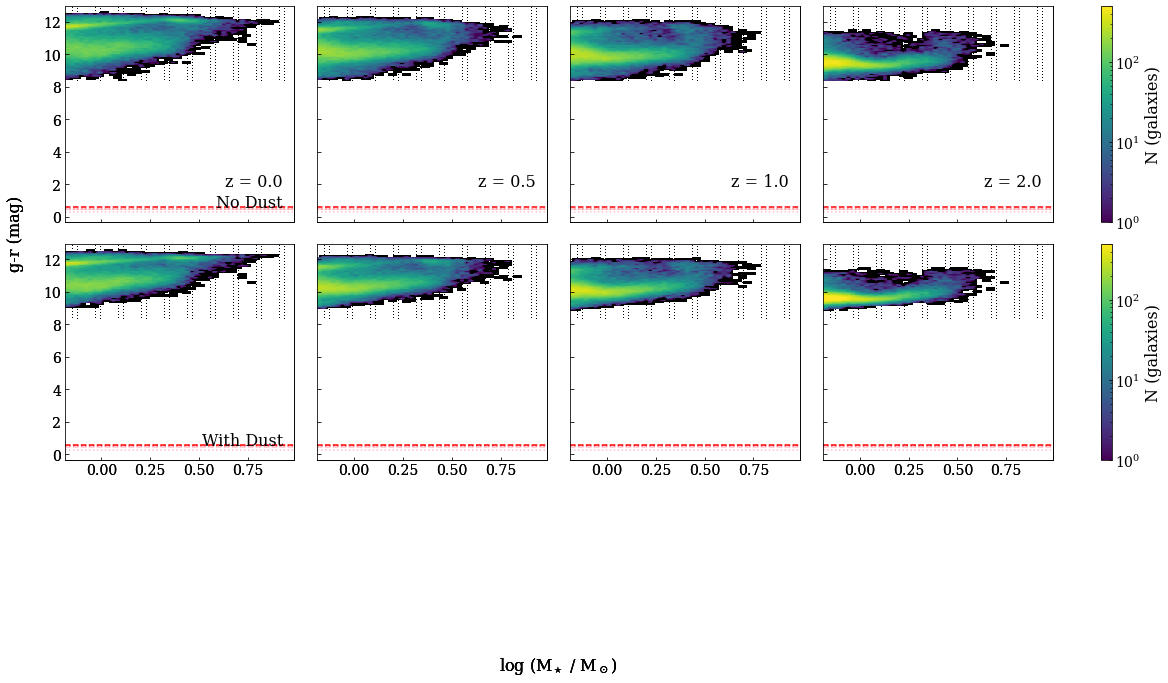

In [19]:
fg = ds.figrid('', 'dust', 'snapshot', in_attrs = {'censat':'all', 'band':'gr'})
fg.setFunc({}, plot_im)
fg.legendArgs(rm_legend = True)
fg.rowLabels(pos = [0.95, 0.05])
fg.rowLabelArgs(va = 'bottom', ha = 'right')
fg.colLabels(pos = [0.95, 0.15])
fg.colLabelArgs(va = 'bottom', ha = 'right')
fg.setYLabel('g-r (mag)')
fg.setXLabel('log (M$_\\star$ / M$_\\odot$)')
fg.gspecArgs(wspace = 0.1, hspace = 0.1)
fg.setDefaultTicksParams()
fg.addCbar('row', norm = 'log', label = 'N (galaxies)', aspect = 7.5, anchor = [0, 1])
fg.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The row values for : ['no key found']
The column values for snapshot: [33]


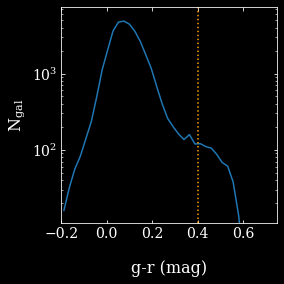

In [5]:
fg = ds.figrid('censat', '', 'snapshot', {'band':'gr', 'dust':'no_dust', 'snapshot':33, 'censat':'all'})
fg.setFunc({}, plot_hist)

fg.setXLabel('g-r (mag)')
fg.setYLabel('N$_{\\mathrm{gal}}$')
fg.legendArgs(rm_legend = True)
fg.gspecArgs(wspace = 0.1, hspace = 0.1, yborder = (0.1, 0.25))
fg.rowLabels([''],pos = (0.5, 0.05))
fg.rowLabelArgs(ha = 'center')
fg.colLabels([''],pos = (0.5, 0.96))
fg.setDefaultTicksParams()
fg.axisArgs(xlim = (-0.2, 0.75), ylim = (11, 7500), yscale = 'log')
pplib.darkmode(fg)
fg.plot()
fg.fig.savefig(WEBPATH + 'images/z=2_gr.png', dpi = 250, facecolor = 'auto', bbox_inches = 'tight')

In [6]:
f = open(WEBPATH + 'captions/high_z_gr.txt')
text = f.read()
fg.fig.text(0.1, -0.05, text, va = 'top', ha = 'left', color = 'white', fontsize = 10)
fg.fig.savefig(WEBPATH + 'images/z=2_gr_caption.png', dpi = 250, bbox_inches = 'tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The row values for dust: ['no_dust', 'dust']
The column values for snapshot: [99, 67, 50, 33]


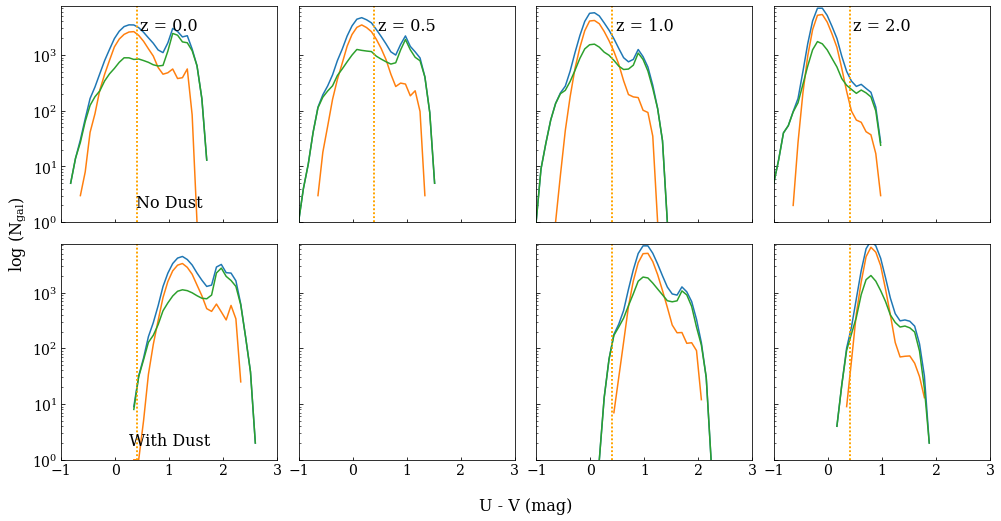

In [44]:
fg = ds.figrid('censat', 'dust', 'snapshot', in_attrs = {'band':'uv'})
fg.setFunc({}, plot_hist)

fg.setXLabel('U - V (mag)')
fg.setYLabel('log (N$_{\\mathrm{gal}}$)')
fg.legendArgs(fontsize = 10)
fg.gspecArgs(wspace = 0.1, hspace = 0.1)
fg.rowLabels(pos = (0.5, 0.05))
fg.rowLabelArgs(ha = 'center')
# fg.colLabels(pos = (0.5, 0.1))
fg.setDefaultTicksParams()
fg.axisArgs(xlim = (-1, 3), ylim = (1, 7500), yscale = 'log')
fg.plot()

The row values for dust: ['no_dust', 'dust']
The column values for snapshot: [99, 67, 50, 33]


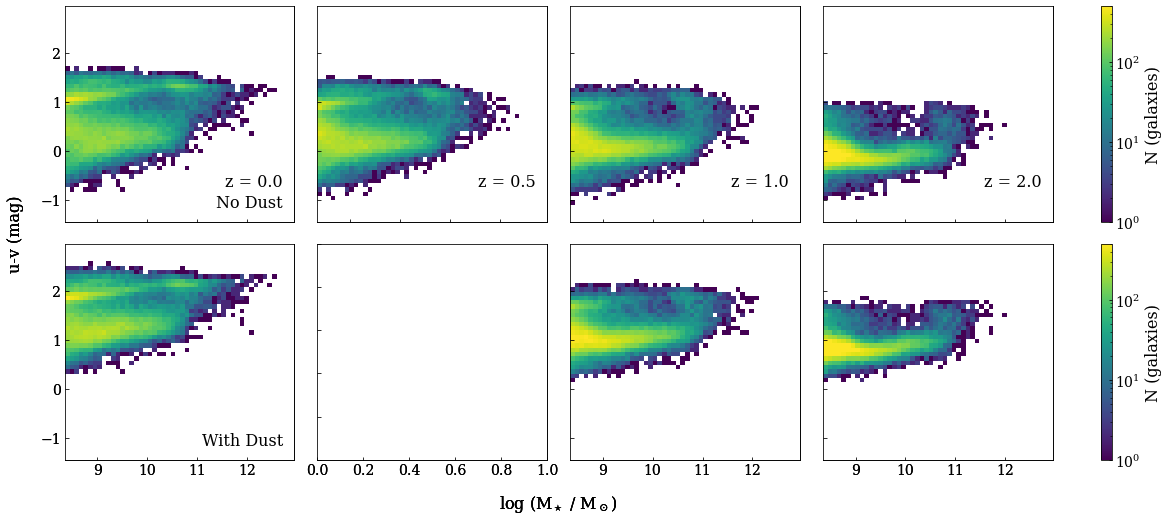

In [45]:
fg = ds.figrid('', 'dust', 'snapshot', in_attrs = {'censat':'all', 'band':'uv'})
fg.setFunc({}, plot_no_line)
fg.legendArgs(rm_legend = True)
fg.rowLabels(pos = [0.95, 0.05])
fg.rowLabelArgs(va = 'bottom', ha = 'right')
fg.colLabels(pos = [0.95, 0.15])
fg.colLabelArgs(va = 'bottom', ha = 'right')
fg.setYLabel('u-v (mag)')
fg.setXLabel('log (M$_\\star$ / M$_\\odot$)')
fg.gspecArgs(wspace = 0.1, hspace = 0.1)
fg.setDefaultTicksParams()
fg.addCbar('row', norm = 'log', label = 'N (galaxies)', aspect = 7.5, anchor = [0, 1])
fg.plot()

# Make Paper Figures

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The row values for censat: ['all', 'centrals', 'satellites']
The column values for snapshot: [99, 67, 50]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


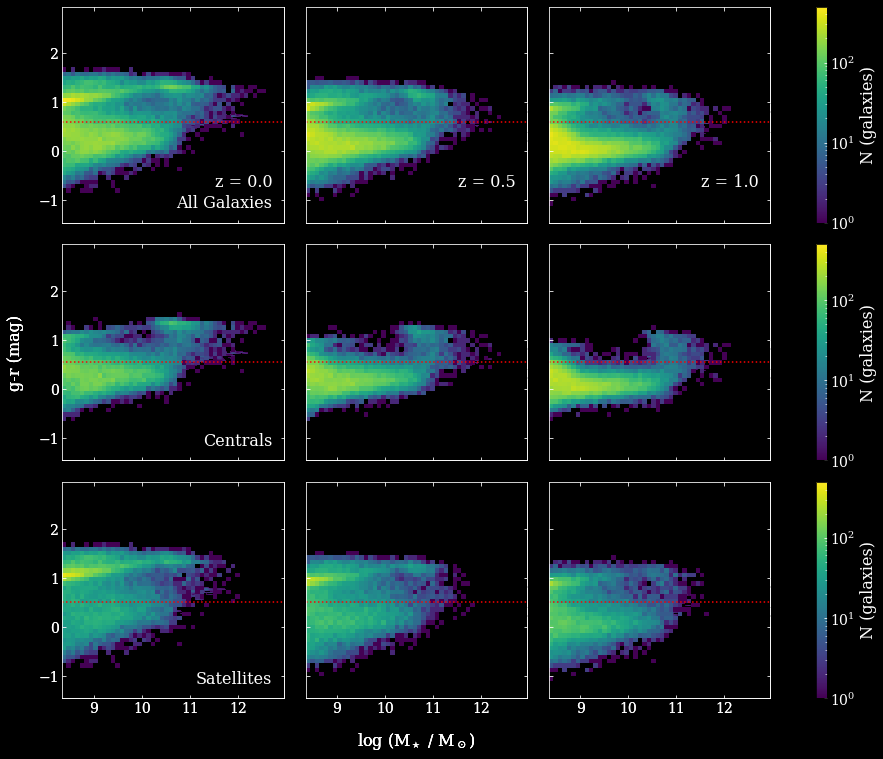

In [7]:
fg = ds.figrid('', 'censat', 'snapshot', in_attrs = {'dust':'no_dust', 'snapshot':[99, 67, 50]})
fg.setFunc({}, plot_no_line)
fg.gspecArgs(yborder = (0.1, 0.25), xborder = (0.25, 0))
fg.legendArgs(rm_legend = True)
fg.rowLabels(pos = [0.95, 0.05])
fg.rowLabelArgs(va = 'bottom', ha = 'right')
fg.colLabels(pos = [0.95, 0.15])
fg.colLabelArgs(va = 'bottom', ha = 'right')
fg.setYLabel('g-r (mag)')
fg.setXLabel('log (M$_\\star$ / M$_\\odot$)')
fg.gspecArgs(wspace = 0.1, hspace = 0.1)
fg.setDefaultTicksParams()
pplib.darkmode(fg)
fg.addCbar('row', norm = 'log', label = 'N (galaxies)', aspect = 7.5, anchor = [0, 1])

fg.plot()
for i in range(3):
    ax = fg.axes[0, i]
    ax.axhline(0.6, color = 'red', linestyle = 'dotted')
    ax = fg.axes[1, i]
    ax.axhline(0.55, color = 'red', linestyle = 'dotted')    
    ax = fg.axes[2, i]
    ax.axhline(0.5, color = 'red', linestyle = 'dotted')
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.savefig(WEBPATH + "images/censat_gr_stmass.png", dpi = 200, facecolor = 'auto', bbox_inches = 'tight')

In [8]:
f = open(WEBPATH + 'captions/censat_gr.txt', 'r')
text = f.read()
fig.text(0.75/fig.get_size_inches()[0], -0.05, text, va = 'top', ha = 'left', color = 'white', fontsize = 16)
fig.savefig(WEBPATH + 'images/censat_gr_caption.png', dpi = 200, bbox_inches = 'tight', facecolor = 'auto')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The row values for snapshot: [99, 67, 50]
The column values for : ['no key found']


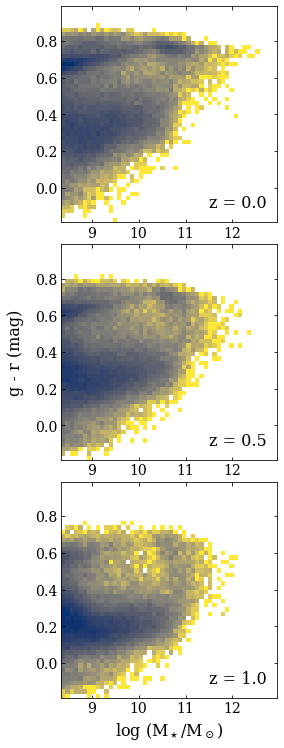

In [9]:
def plot_im(ax, data, kwargs):
    x = data[0, :]
    y = data[1, :]
    data = data[2:, :]
    kwargs['aspect'] = 'auto'
    kwargs['origin'] = 'lower'
    kwargs['extent'] = (x[0], x[-1], y[0], y[-1])    
    norm = mpl.colors.LogNorm(vmin = 1, vmax = 500)
    cmap = copy.copy(mpl.cm.get_cmap('cividis_r'))
    cmap.set_under(cmap(1))
    kwargs['norm'] = norm
    kwargs['cmap'] = cmap
    ax.imshow(np.flipud(np.rot90(data)), **kwargs)
    
    xlim = ax.get_xlim()
    # ax.plot(xlim, [0.6, 0.6], color = 'red', linestyle = 'dashed')
    # ax.plot(xlim, [0.5, 0.5], color = 'red', linestyle = 'dotted')
    # ax.plot(xlim, [0.45, 0.45], color = 'pink', linestyle = 'dashed')
    # ax.plot(xlim, [0.3, 0.3], color = 'pink', linestyle = 'dotted')
    return

fg = ds.figrid('censat', 'snapshot', '', {'censat':'all','band':'gr', 'snapshot':[99, 67, 50], 'dust':'no_dust'})
fg.setFunc({}, plot_im)
fg.setXLabel('log (M$_\\star$/M$_\\odot$)')
fg.setYLabel('g - r (mag)')
fg.rowLabels(pos = [0.95, 0.05])
fg.rowLabelArgs(ha = 'right', va = 'bottom')
fg.gspecArgs(yborder = [0.1, 0.2], wspace = 0.1, hspace = 0.1, xborder = [0.25, 0.1])

# fg.addCbar('row', norm = 'log', label = 'N (galaxies)', aspect = 7.5, anchor = [0, 1])

fg.plot()


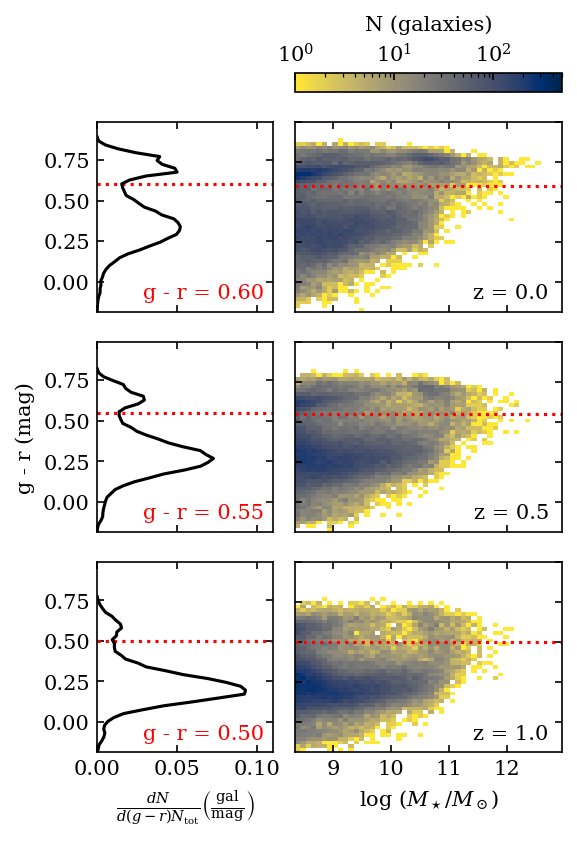

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
def plot_hist(ax, data, kwargs):
    x = data[0, :]
    y = data[1, :]
    data = data[2:, :]
    gr = np.sum(data, axis = 0)
    mask_zero = gr >= 1
    ax.plot(gr[mask_zero]  /np.sum(gr[mask_zero]), y[mask_zero], **kwargs)
    return

fig, axes = plt.subplots(4, 2, dpi = 150,
                         gridspec_kw = {'width_ratios': [0.66, 1], 'height_ratios':[0.1, 1, 1, 1],
                                        'wspace':0.1, 'hspace':0.2})
fig.set_size_inches(4, 6)
norm = mpl.colors.LogNorm(vmin = 1, vmax = 500)
cmap = copy.copy(mpl.cm.get_cmap('cividis_r'))
smap = mpl.cm.ScalarMappable(norm, cmap)
grth = [0.6, 0.55, 0.5]
rowlabs = ['z = 0.0', 'z = 0.5', 'z = 1.0']

for i in range(len(axes)):
    if i == 0:
        axes[i, 0].set_visible(False)
        ax = axes[i, 1]
        plt.colorbar(smap, cax = ax, orientation = 'horizontal')
        ax.tick_params(labelbottom = False, bottom = False, top = True, direction = 'in',
                      labeltop = True, which = 'both', labelsize = 10)
        ax.set_title('N (galaxies)', fontsize = 10)
    else:
        data = fg.panels[i-1, 0][0].getData()
        
        for j in range(2):

            ax = axes[i][j]
            ax.tick_params(which = 'both', direction = 'in', top = True, right = True, labelsize = 10)
            if not i == 3:
                ax.tick_params(which = 'both', labelbottom = False)
            if not i == 0:
                ax.axhline(grth[i - 1], color = 'red', linestyle = ':')
                if j == 0:
                    ax.text(0.95, 0.05, 'g - r = %.2f'%grth[i - 1],
                           transform = ax.transAxes, ha = 'right',
                           va = 'bottom', color = 'red', fontsize = 10)
                else:
                    ax.text(0.95, 0.05, rowlabs[i-1],
                           transform = ax.transAxes, ha = 'right',
                           va = 'bottom', color = 'black', fontsize = 10)
            if j == 1:
                plot_im(ax, data, {})
                ax.tick_params(which = 'both', labelleft = False)
                ax.set_xticks([9, 10, 11, 12])
                ylim = ax.get_ylim()
                axes[i][j-1].set_ylim(ylim)
                ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
                if i == 3:
                    ax.set_xlabel('log ($M_\\star / M_\\odot$)')
            if j == 0:
                plot_hist(ax, data, {'color':'black'})
                ax.set(xscale = 'linear', xlim = (0, 0.11))
                ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
                ax.set_xticks([0, 0.05, 0.1])
                if i == 2:
                    ax.set_ylabel('g - r (mag)')
                
                if i == 3:
                    ax.set_xlabel('$\\frac{dN}{d(g - r) N_{\\mathrm{tot}}} \\left(\\frac{\\mathrm{gal}}{\\mathrm{mag}}\\right)$')
fig.savefig('/Users/cosinga/code/hicolor_draft_two/figures/color-stmass.pdf', bbox_inches = 'tight', dpi = 200)


The row values for : ['no key found']
The column values for snapshot: [99, 67, 50]
[10.95, 2.6]


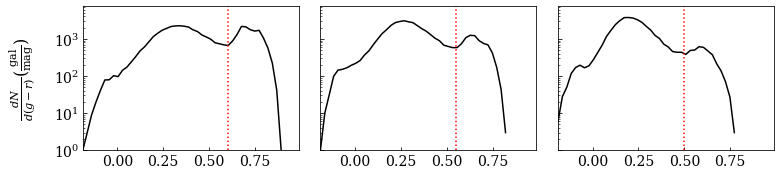

In [15]:
fg1d = ds.figrid('censat', '', 'snapshot', {'band':'gr', 'censat':'all', 'snapshot':[99, 67, 50], 'dust':'no_dust'})
fg1d.setFunc({}, plot_hist)
fg1d.plotArgs({}, color = 'black')
fg1d.setXLabel('g-r (mag)')
fg1d.setYLabel('$\\frac{dN}{d(g - r)} (\\frac{\\mathrm{gal}}{\\mathrm{mag}})$')
fg1d.legendArgs(fontsize = 13)
fg1d.setPanelsize(3, 2)
fg1d.setXLabel('')
fg1d.gspecArgs(wspace = 0.1, hspace = 0.1, xborder = [0.35, 0.1])
fg1d.rowLabels(pos = (0.5, 0.05))
fg1d.rowLabelArgs(ha = 'center')
fg1d.colLabels(collabels=['', '', ''])
fg1d.setDefaultTicksParams()
fg1d.axisArgs(xlim = (-0.18799999356269836, 0.9880000352859497), ylim = (1, 7500), yscale = 'log')
fg1d.legendArgs(rm_legend=True)
fg1d.plot()
for i in range(3):
    ax = fg1d.axes[0, i]
    ylim = ax.get_ylim()
    if i == 0:
        ax.plot([0.60, 0.60], ylim, color = 'red', linestyle = ':')
    elif i == 1:
        ax.plot([0.55, 0.55], ylim, color = 'red', linestyle = ':')
    elif i == 2:
        ax.plot([0.50, 0.50], ylim, color = 'red', linestyle = ':')
print(fg1d.calculateFigsize())


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{'x': {}, 'y': {}, 'both': {'fontsize': 16}}


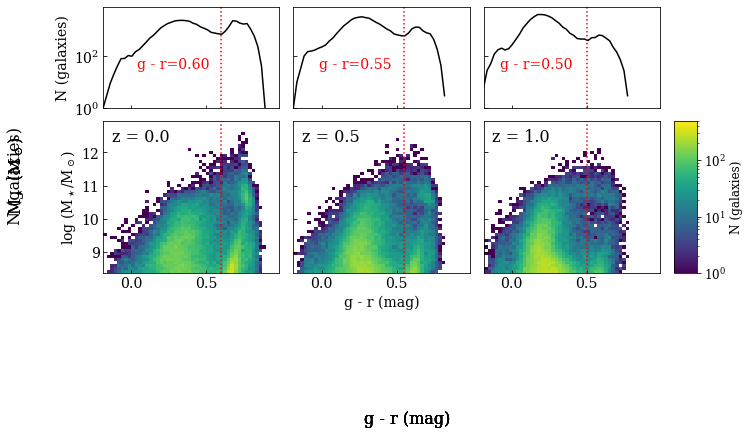

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
figsize = [10.65, 3.9+2.6]
fig, axes = plt.subplots(2, 4, figsize = figsize, gridspec_kw={'top':1 - 0.1, 'bottom':0.33, 'width_ratios':[1, 1, 1, 1/7.5], 'wspace':0.1, 'hspace':0.1, 'height_ratios':[2, 3]})
fgaxes = axes[1,:]
fgaxes = fgaxes.reshape(1, 4)
fg1daxes = axes[0, :].reshape(1, 4)
fg.setYLabel('')
fg1d.setYLabel('')
fg1d.setXLabel('')
print(fg1d.axis_label_args)
fg.plot(subfig = fig, axes = fgaxes)
fg1d.plot(subfig = fig, axes = fg1daxes)
for j in range(2):
    for i in range(3):
        ax = axes[j, i]
        ylim = ax.get_ylim()
        if i == 0:
            ax.plot([0.60, 0.60], ylim, color = 'red', linestyle = ':')
            if j == 0:
                ax.text(0.4, 0.5, 'g - r=0.60', color = 'red', va = 'top', ha = 'center',
                        transform = ax.transAxes, fontsize = 14)
                ax.tick_params(labelbottom = False)
                ax.set_ylabel('N (galaxies)', fontsize = 14)
            else:
                ax.set_ylabel('log (M$_\\star$/M$_\\odot$)', fontsize = 14)
        elif i == 1:
            ax.plot([0.55, 0.55], ylim, color = 'red', linestyle = ':')
            if j == 0:
                ax.text(0.35, 0.5, 'g - r=0.55', color = 'red', va = 'top', ha = 'center',
                        transform = ax.transAxes, fontsize = 14)
                ax.tick_params(labelbottom = False)
            else:
                ax.set_xlabel('g - r (mag)', fontsize = 14)
        elif i == 2:
            ax.plot([0.50, 0.50], ylim, color = 'red', linestyle = ':')
            if j == 0:
                ax.text(0.3, 0.5, 'g - r=0.50', color = 'red', va = 'top', ha = 'center',
                        transform = ax.transAxes, fontsize = 14)
                ax.tick_params(labelbottom = False)

axes[0,3].set_visible(False)
norm = mpl.colors.LogNorm(vmin = 1, vmax = 500)
smap = mpl.cm.ScalarMappable(norm = norm, cmap = 'viridis')
cb = plt.colorbar(cax = axes[1, 3], mappable = smap)
cb.set_label(label = 'N (galaxies)', fontsize = 12)
axes[1,3].tick_params(labelsize = 12)
fig.savefig('/Users/cosinga/code/hicolor_draft_two/figures/gr-stmass.pdf', dpi = 200)
fig.savefig('gr-stmass.png')

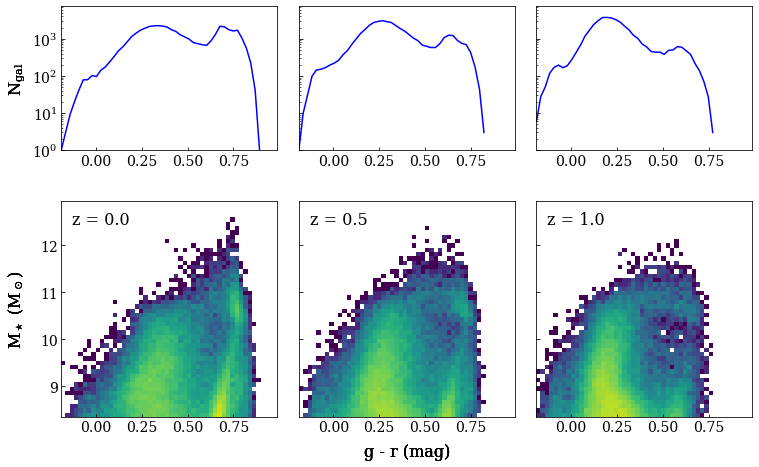

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The row values for : ['no key found']
The column values for snapshot: [99]
{'height_ratios': array([1.]), 'width_ratios': array([1.]), 'hspace': array([], dtype=float64), 'wspace': array([], dtype=float64), 'xborder': array([0.25, 0.  ]), 'yborder': array([0.  , 0.25])}
[0.6, 0]
[0, 0.6]
[0.6, 0]
[0, 0.6]


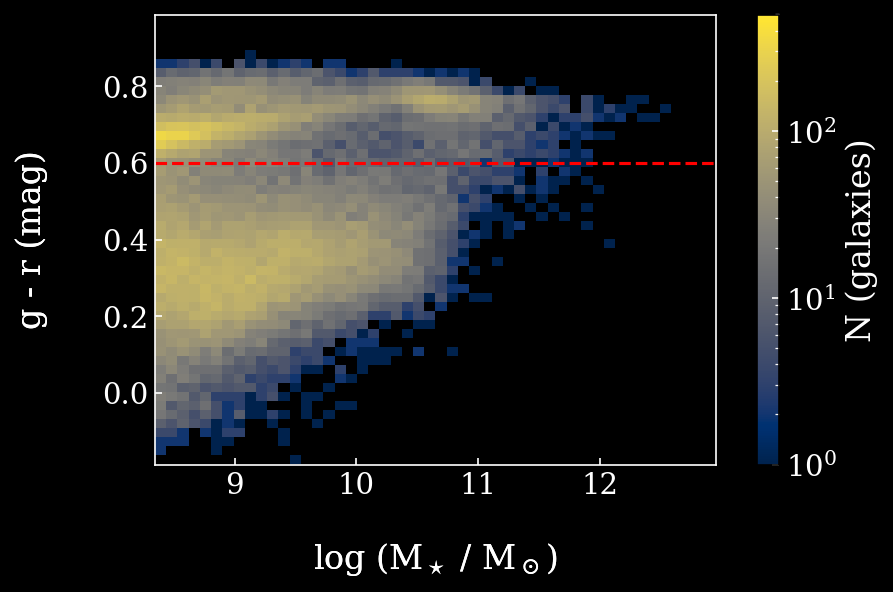

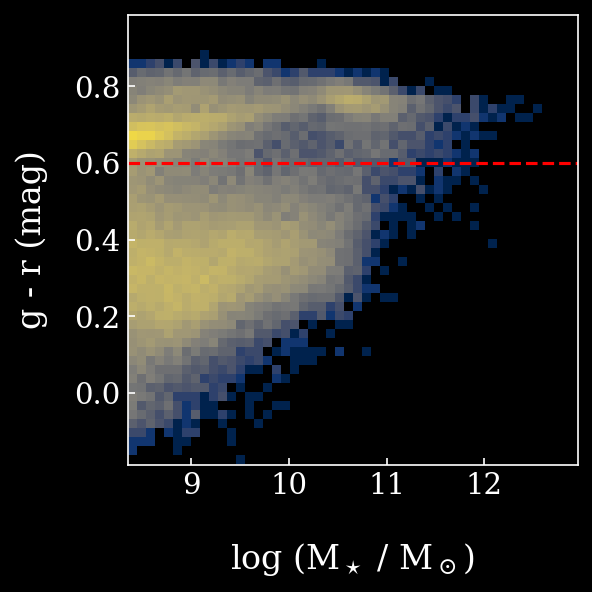

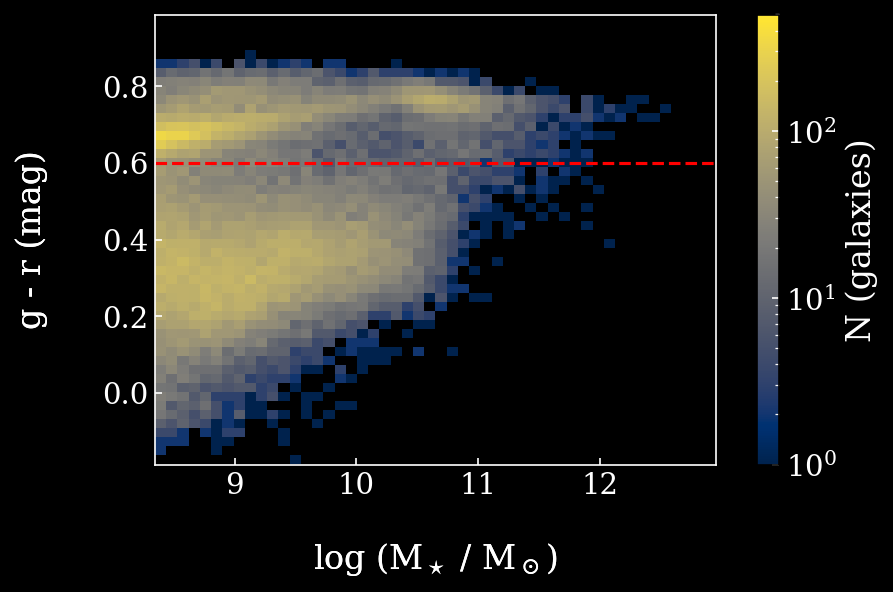

In [6]:
# presentation figure

def plot_im(ax, data, kwargs):
    x = data[0, :]
    y = data[1, :]
    data = data[2:, :]
    kwargs['aspect'] = 'auto'
    kwargs['origin'] = 'lower'
    kwargs['extent'] = (x[0], x[-1], y[0], y[-1])    
    norm = mpl.colors.LogNorm(vmin = 1, vmax = 500)
    cmap = copy.copy(mpl.cm.get_cmap('cividis'))
    cmap.set_under('k')
    kwargs['norm'] = norm
    kwargs['cmap'] = cmap
    ax.imshow(np.flipud(np.rot90(data)), **kwargs)
    
    xlim = ax.get_xlim()
    ax.plot(xlim, [0.6, 0.6], color = 'red', linestyle = 'dashed')
    # ax.plot(xlim, [0.5, 0.5], color = 'red', linestyle = 'dotted')
    # ax.plot(xlim, [0.45, 0.45], color = 'pink', linestyle = 'dashed')
    # ax.plot(xlim, [0.3, 0.3], color = 'pink', linestyle = 'dotted')
    return

fg = ds.figrid('censat', '', 'snapshot', {'censat':'all','band':'gr', 'snapshot':[99], 'dust':'no_dust'})
fg.setFunc({}, plot_im)
pplib.darkmode(fg)
fg.figArgs(dpi = 150)
fg.setXLabel('log (M$_\\star$ / M$_\\odot$)')
fg.setYLabel('g - r (mag)')
fg.colLabels([''])
fg.rowLabels([''])
# fg.gspecArgs(yborder = [0.1, 0.2], wspace = 0.1, hspace = 0.1, xborder = [0.25, 0.1])
fg.setDefaultTicksParams()

print(fg.gspec_args)
fg.plot()
fg.addCbar('row', cmap = 'cividis', norm = 'log', label = 'N (galaxies)', aspect = 7.5, anchor = [0, 1])

# for i in range(3):
#     ax = fg.axes[0, i]
#     ylim = ax.get_ylim()
#     if i == 0:
#         ax.plot([0.60, 0.60], ylim, color = 'red', linestyle = ':')
#         ax.text(0.05, 0.8, '0.60', color = 'red', va = 'top', ha = 'left',
#                 transform = ax.transAxes, fontsize = 14)
#     elif i == 1:
#         ax.plot([0.55, 0.55], ylim, color = 'red', linestyle = ':')
#         ax.text(0.05, 0.8, '0.55', color = 'red', va = 'top', ha = 'left',
#                 transform = ax.transAxes, fontsize = 14)
#     elif i == 2:
#         ax.text(0.05, 0.8, '0.50', color = 'red', va = 'top', ha = 'left',
#                 transform = ax.transAxes, fontsize = 14)
#         ax.plot([0.50, 0.50], ylim, color = 'red', linestyle = ':')

# fg.calculateFigsize()
# fg.save("/Users/cosinga/code/hcolor/fig_md_analysis/populations/presentation_gr-stmass.png", dpi = 200)

The row values for : ['no key found']
The column values for snapshot: [99]
[0.5555555555555556, 0]
[0, 0.5384615384615385]


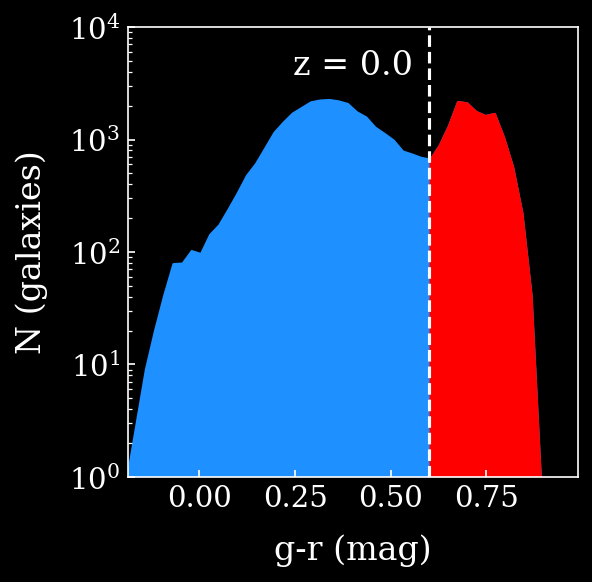

In [34]:
def plot_hist_6(ax, data, kwargs):
    x = data[0, :]
    y = data[1, :]
    data = data[2:, :]
    gr = np.sum(data, axis = 0)
    mask_zero = gr >= 1
    blue_mask = (y <= 0.6) & mask_zero
    blue_mask[np.where(~blue_mask)[0]] = True
    red_mask = (y>=0.6) & mask_zero
    ax.fill_between(y[blue_mask], gr[blue_mask], color = 'dodgerblue')
    ax.fill_between(y[red_mask], gr[red_mask], color = 'red')

    # ax.plot([0.6, 0.6], ax.get_ylim())
    # ax.plot([0.55, 0.55], ax.get_ylim())
    # ax.plot([0.5, 0.5], ax.get_ylim())
#     ylim = ax.get_ylim()
#     ax.plot([0.6, 0.6], ylim, color = 'red', linestyle = 'dashed')
#     ax.plot([0.5, 0.5], ylim, color = 'red', linestyle = 'dotted')
#     ax.plot([0.45, 0.45], ylim, color = 'pink', linestyle = 'dashed')
#     ax.plot([0.35, 0.35], ylim, color = 'pink', linestyle = 'dotted')
    return

def plot_hist_55(ax, data, kwargs):
    x = data[0, :]
    y = data[1, :]
    data = data[2:, :]
    gr = np.sum(data, axis = 0)
    mask_zero = gr >= 1
    blue_mask = (y <= 0.55) & mask_zero
    blue_mask[np.where(~blue_mask)[0]] = True
    red_mask = (y>=0.55) & mask_zero
    ax.fill_between(y[blue_mask], gr[blue_mask], color = 'dodgerblue')
    ax.fill_between(y[red_mask], gr[red_mask], color = 'red')

    # ax.plot([0.6, 0.6], ax.get_ylim())
    # ax.plot([0.55, 0.55], ax.get_ylim())
    # ax.plot([0.5, 0.5], ax.get_ylim())
#     ylim = ax.get_ylim()
#     ax.plot([0.6, 0.6], ylim, color = 'red', linestyle = 'dashed')
#     ax.plot([0.5, 0.5], ylim, color = 'red', linestyle = 'dotted')
#     ax.plot([0.45, 0.45], ylim, color = 'pink', linestyle = 'dashed')
#     ax.plot([0.35, 0.35], ylim, color = 'pink', linestyle = 'dotted')
    return

fg1d = ds.figrid('censat', '', 'snapshot', {'band':'gr', 'censat':'all', 'snapshot':[99], 'dust':'no_dust'})
fg1d.setFunc({'snapshot':99}, plot_hist_6)
fg1d.setFunc({'snapshot':67}, plot_hist_55)
fg1d.figArgs(dpi = 150)
fg1d.setXLabel('g-r (mag)')
fg1d.setYLabel('N (galaxies)')
fg1d.legendArgs(fontsize = 13)
fg1d.gspecArgs(wspace = 0.5, hspace = 0.1, xborder = [0.25, 0.1])
fg1d.rowLabels(pos = (0.5, 0.05))
fg1d.rowLabelArgs(ha = 'center')
pplib.darkmode(fg1d)
fg1d.axisArgs(xlim = (-0.18799999356269836, 0.9880000352859497), ylim = (1, 1e4), yscale = 'log')
fg1d.legendArgs(rm_legend=True)
fg1d.plot()
for i in range(1):
    ax = fg1d.axes[0, i]
    ylim = ax.get_ylim()
    if i == 0:
        ax.plot([0.60, 0.60], ylim, color = 'white', linestyle = '--')


The row values for : ['no key found']
The column values for snapshot: [67]
[0.5555555555555556, 0]
[0, 0.5384615384615385]


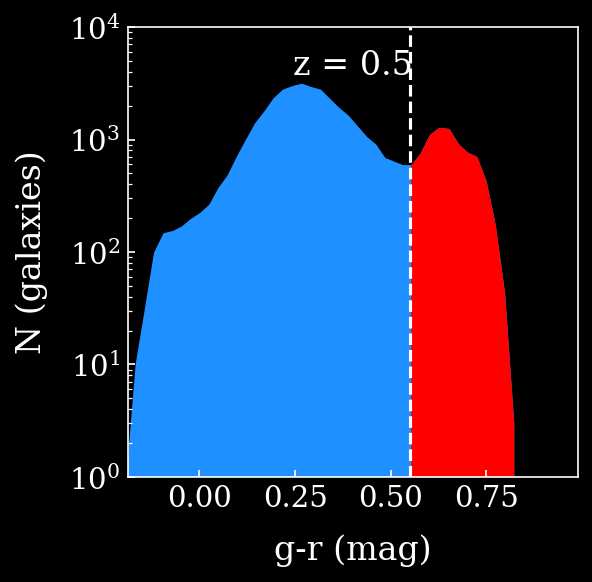

In [35]:
fg1d = ds.figrid('censat', '', 'snapshot', {'band':'gr', 'censat':'all', 'snapshot':[67], 'dust':'no_dust'})
fg1d.setFunc({'snapshot':99}, plot_hist_6)
fg1d.setFunc({'snapshot':67}, plot_hist_55)
fg1d.setXLabel('g-r (mag)')
fg1d.setYLabel('N (galaxies)')
fg1d.legendArgs(fontsize = 13)
fg1d.gspecArgs(wspace = 0.5, hspace = 0.1, xborder = [0.25, 0.1])
fg1d.rowLabels(pos = (0.5, 0.05))
fg1d.rowLabelArgs(ha = 'center')
pplib.darkmode(fg1d)
fg1d.axisArgs(xlim = (-0.18799999356269836, 0.9880000352859497), ylim = (1, 1e4), yscale = 'log')
fg1d.legendArgs(rm_legend=True)
fg1d.figArgs(dpi = 150)

fg1d.plot()
for i in range(1):
    ax = fg1d.axes[0, i]
    ylim = ax.get_ylim()
    if i == 0:
        
        ax.plot([0.55, 0.55], ylim, color = 'white', linestyle = '--')
